In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
pd.set_option('mode.use_inf_as_na', True)

In [11]:
stock = 'adbe'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25
period = 15

In [12]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [13]:
#data =  yf.download(stock, start=start)

In [14]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = date)

In [15]:
data = pd.read_csv(".\\data\\" + stock.upper() + ".csv")
#data['Date'] = pd.to_datetime(data['Date']).dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5408 non-null   object 
 1   Open       5408 non-null   float64
 2   High       5408 non-null   float64
 3   Low        5408 non-null   float64
 4   Close      5408 non-null   float64
 5   Adj Close  5408 non-null   float64
 6   Volume     5408 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 295.9+ KB


In [16]:
df = data["Close"].pct_change() * 100
#df.describe()

In [17]:
#df = df.rename(columns = "Today_Change_%")
#df
#df = df.reset_index()

In [18]:
#df1 = pd.merge(data,df, on="Date")
data["Today_Change_%"] = df
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
df1 = data.copy()

In [19]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [20]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [21]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [22]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [23]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [24]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [25]:
df1.dropna(inplace= True)

In [26]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [27]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [28]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [29]:
df1.dropna(inplace= True)
df1.tail(10)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
5398,1.0,2021-06-25,578.640015,582.000000,577.059998,579.659973,579.659973,16.267030,13.502814,0.242099,...,0.549088,1.019958,2.359986,4.940002,6.009949,1,544.996109,519.611684,25.384426,24.186548
5399,1.0,2021-06-28,582.710022,589.409973,581.000000,588.799988,588.799988,-19.662526,16.267030,1.576789,...,0.526311,6.089966,1.019958,8.409973,4.940002,1,549.167907,522.324951,26.842957,25.384426
5400,1.0,2021-06-29,586.780029,591.340027,583.900024,590.750000,590.750000,-29.708285,-19.662526,0.331184,...,0.927469,3.969971,6.089966,7.440003,8.409973,1,553.128107,525.008286,28.119821,26.842957
5401,1.0,2021-06-30,590.750000,592.239990,585.000000,585.640015,585.640015,41.450863,-29.708285,-0.865000,...,0.920695,-5.109985,3.969971,7.239990,7.440003,0,556.224479,527.386001,28.838478,28.119821
5402,1.0,2021-07-01,583.330017,587.780029,581.349976,584.729980,584.729980,-3.409224,41.450863,-0.155392,...,0.088400,1.399963,-5.109985,6.430053,7.239990,0,558.939289,529.634784,29.304504,28.838478
5403,1.0,2021-07-02,588.669983,594.080017,587.960022,593.070007,593.070007,5.983841,-3.409224,1.426304,...,0.525657,4.400024,1.399963,6.119995,6.430053,1,562.189833,532.122440,30.067393,29.304504
5404,1.0,2021-07-06,595.869995,600.659973,592.479980,596.900024,596.900024,-4.998280,5.983841,0.645795,...,0.834966,1.030029,4.400024,8.179993,6.119995,1,565.495566,534.662737,30.832828,30.067393
5405,1.0,2021-07-07,600.000000,607.669983,597.400024,605.770020,605.770020,22.028478,-4.998280,1.486010,...,0.540348,5.770020,1.030029,10.269959,8.179993,1,569.331228,537.451258,31.879970,30.832828
5406,1.0,2021-07-08,595.640015,607.299988,593.330017,605.950012,605.950012,-8.697157,22.028478,0.029713,...,0.814998,10.309997,5.770020,13.969971,10.269959,1,572.818731,540.137484,32.681247,31.879970
5407,1.0,2021-07-09,601.429993,605.950012,597.440002,604.500000,604.500000,16.132351,-8.697157,-0.239296,...,0.903366,3.070007,10.309997,8.510010,13.969971,0,575.835995,542.661504,33.174491,32.681247


In [30]:
#X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

In [31]:
#df1['Close'][-150:].plot(figsize=(16,6))
#df1['Short_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#df1['Long_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#plt.xlim([len(df1)-100, len(df1)])
#plt.xlabel('Index', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize =18)
#plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
#plt.title("Moving Average for " + stock.upper(), fontsize = 16)
#plt.show
#plt.close

<function matplotlib.pyplot.close(fig=None)>

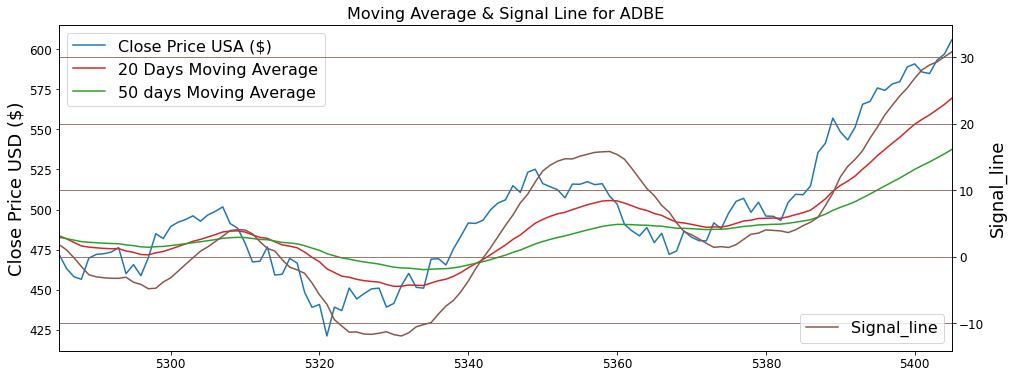

In [32]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['Close'][-150:].plot(x = 'Index', color='tab:blue', figsize=(16,6), label = 'Close Price USA ($)', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = str(short_moving_average_span) + ' Days Moving Average', fontsize = 12, ax = ax1)
df1['Long_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:green', figsize=(16,6), label = str(long_moving_average_span) + ' days Moving Average', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'][-150:].plot(x = 'Index', color='tab:brown', figsize=(16,6), label = 'Signal_line', fontsize = 12, ax = ax2)
#df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax1)
#df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax2)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-120, len(df1)])
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
ax2.set_ylabel('Signal_line', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:brown')
ax1.set_title("Moving Average & Signal Line for " + stock.upper(), fontsize = 16)
ax1.legend(loc=2, fontsize = 16)
ax2.legend(loc=4,fontsize = 16)
plt.show
plt.close

In [33]:
df1['Signal_Line'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'].ewm(span = period, adjust=False ).mean()
#column_list = list(df1)
#print (column_list)
#df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Up', 'Down', 'Signal_Line']]
df1['Signal_Line_Lag'] =  df1['Signal_Line'].shift(1)
df1.dropna(inplace= True)
#df1.info()

In [34]:
X = df1[['const','Trend_Lag','Signal_Line_Lag','Volume_Lag']]

In [35]:
y = df1["Up_Down"].values

In [36]:
model = sm.Logit(y,X)

In [37]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.690088
         Iterations 4


In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5404
Model:                          Logit   Df Residuals:                     5400
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                0.002923
Time:                        13:11:14   Log-Likelihood:                -3729.2
converged:                       True   LL-Null:                       -3740.2
Covariance Type:            nonrobust   LLR p-value:                 6.958e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3088      0.056      5.509      0.000       0.199       0.419
Trend_Lag          -0.4159      0.090     -4.617      0.000      -0.592      -0.239
Signal_Line_Lag     0.0044      0.007      0.637      0.524      -0.009       0.018
Volume_Lag         -0.0003      0.001     -0.637      0.524      -0.001       0.001
===================================================================================
"""

In [39]:
prediction = result.predict(X)

In [40]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [41]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [42]:
y = df1["Up_Down"].values

In [43]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [44]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,854,1725
Up,802,2023


In [45]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5323834196891192


In [46]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6251629726205997


In [47]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [48]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [49]:
#df1.info()
#column_list = list(df1)
#print (column_list)
df1['Signal_Line_Lag'] = df1['Signal_Line'].shift(1)
df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Signal_Line', 'Signal_Line_Lag']]
#df1.info()

In [50]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [51]:
#df1.info()

In [52]:
df1 = df1.assign(Up=np.nan,Down=np.nan)
#df1.info()

In [53]:
for i in range(len(df1)):
    if df1.iloc[i,9] <= 0:
        df1.iloc[i,27] = 0
        df1.iloc[i,28] = df1.iloc[i,9]
    else:
        df1.iloc[i,28] = 0
        df1.iloc[i,27] = df1.iloc[i,9]

AVG_Gain = df1.Up.ewm(span=period, adjust=False).mean()
AVG_Loss = df1.Down.ewm(span=period, adjust=False).mean().abs()

In [54]:
RS = AVG_Gain /AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))
df1['RSI'] = RSI
df1['RSI_Lag'] = df1['RSI'].shift(1)
#df1.tail(10)

<function matplotlib.pyplot.close(fig=None)>

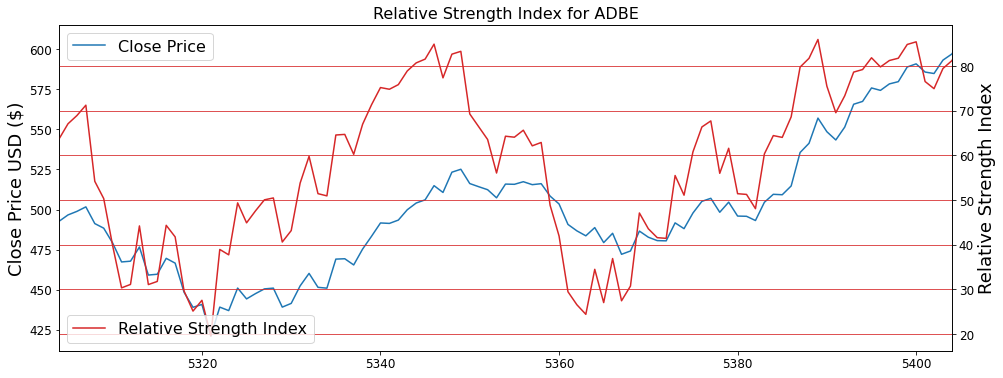

In [55]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax2)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-100, len(df1)])
ax2.set_ylabel('Relative Strength Index', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:red')
ax1.set_title("Relative Strength Index for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.show
plt.close

<function matplotlib.pyplot.close(fig=None)>

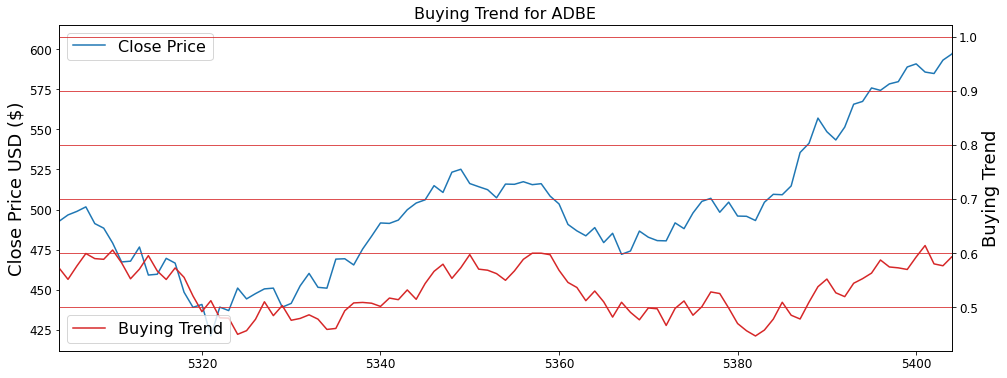

In [56]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['Trend_Lag'][-150:].ewm(span = period *2, adjust=False ).mean().plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Buying Trend', fontsize = 12,ax = ax2)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
ax2.set_ylabel('Buying Trend', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
plt.xlim([len(df1)-100, len(df1)])
ax2.grid(color='tab:red')
ax1.set_title("Buying Trend for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.close

In [57]:
df1.dropna(inplace= True)
X = df1[['const','Trend_Lag', 'RSI_Lag', 'Signal_Line_Lag','Volume_Lag']]
y = df1["Up_Down"].values
model = sm.Logit(y,X)
result =  model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.689750
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5403
Model:                          Logit   Df Residuals:                     5398
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                0.003398
Time:                        13:11:19   Log-Likelihood:                -3726.7
converged:                       True   LL-Null:                       -3739.4
Covariance Type:            nonrobust   LLR p-value:                 4.150e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4714      0.103      4.563      0.000       0.269       0.674
Trend_Lag          -0.3508      0.097     -3.628      0.000      -0.540      -0.161
RSI_Lag            -0.0037      0.002     -1.867      0.062      -0.007       0.000
Signal_Line_Lag     0.0065      0.007      0.916      0.360      -0.007       0.020
Volume_Lag         -0.0004      0.001     -0.675      0.500      -0.001       0.001
===================================================================================
"""

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5408 non-null   datetime64[ns]
 1   Open            5408 non-null   float64       
 2   High            5408 non-null   float64       
 3   Low             5408 non-null   float64       
 4   Close           5408 non-null   float64       
 5   Adj Close       5408 non-null   float64       
 6   Volume          5408 non-null   int64         
 7   Today_Change_%  5407 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 338.1 KB


In [59]:
print("\nIf ${:,.0f} was invested in [ {} ], and Just Hold and Not Trade for {:2d} years, the ROI = ${:,.0f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 1] * data.iloc[-1,1]))


If $100 was invested in [ ADBE ], and Just Hold and Not Trade for 22 years, the ROI = $3,581


In [60]:
print ("\nIf ${:,.0f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.0f}".format(invest, diff_years, (money + (share * df1.iloc[-1,4]))))


If $100 was invested 22 years ago, buy and sell according this script's recommandation, the ROI = $3,342


In [61]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
5393 2021-06-18                       Up              Down
5394 2021-06-21                       Up                Up
5395 2021-06-22                       Up                Up
5396 2021-06-23                     Down              Down
5397 2021-06-24                       Up                Up
5398 2021-06-25                       Up                Up
5399 2021-06-28                       Up                Up
5400 2021-06-29                       Up                Up
5401 2021-06-30                     Down                Up
5402 2021-07-01                     Down                Up
5403 2021-07-02                       Up                Up
5404 2021-07-06                       Up                Up
5405 2021-07-07                       Up                Up
5406 2021-07-08                       Up                Up
5407 2021-07-09                     Down                Up


In [62]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [63]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ ADBE ] actually went down, --- base on yesterday's data, We Predication [ ADBE ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [64]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [65]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.689587
         Iterations 4


In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 5273
Model:                          Logit   Df Residuals:                     5268
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                0.003781
Time:                        13:11:19   Log-Likelihood:                -3636.2
converged:                       True   LL-Null:                       -3650.0
Covariance Type:            nonrobust   LLR p-value:                 1.501e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4962      0.105      4.726      0.000       0.290       0.702
Trend_Lag          -0.3538      0.098     -3.616      0.000      -0.545      -0.162
RSI_Lag            -0.0042      0.002     -2.119      0.034      -0.008      -0.000
Signal_Line_Lag     0.0090      0.007      1.218      0.223      -0.006       0.024
Volume_Lag         -0.0004      0.001     -0.760      0.447      -0.001       0.001
===================================================================================
"""

In [67]:
#summary_list=result.summary().as_csv().split(",")

In [68]:
#print(summary_list)

In [69]:
#print(summary_list[37:39])

In [70]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,16,40
Up,22,52


In [71]:
z = confusion_matrix(y_test,prediction)

In [72]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5231 <=========



In [73]:
#df1.info()

In [74]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 28], df1.iloc[-1, 21], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5502,   [ ADBE ] will go up! <=========


In [75]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 30.0674....30.8328....31.8800....32.6812....33.1745....<=============

 ============> No Trading Waring at this time! <=============


In [76]:
#df1.to_csv('fb.csv', index = False)